# E Commerce Application

### Background: 
This portfolio aims to gather, analyze product information matter to E commerce companies. This project is divided into 2 parts. I will explore the first dataset to determine what product brands matter.
My goal is to
• Identify substitute items
• Identify instances of people purchasing more expensive substitute
o These are brands that people care about
o Who are these people?
o When and why do these brands matter?

In [76]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [97]:
# helper function
def plot_feature(df, col):
    
    plt.figure(figsize = (14, 6))
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        df[col] = df[col].astype('category')
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title('Distribution of'+ " "+ col)
    plt.show()

# Discover the Data

In [124]:
# import dataset
product_brand = pd.read_table('dataset/Transactions with A&S.txt',skiprows =1,names= ('order_num','l1','l2','l3','productid','brand'))



/Users/ngjo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [125]:
product_brand.head()

,order_num,l1,l2,l3,productid,brand
0,1182478,"Adhesives, Sealants and Tape",Putties,Putties,122821,2180
1,63908,"Adhesives, Sealants and Tape",Caulks,Caulks and Sealants,276172,1054
2,1165840,"Adhesives, Sealants and Tape",Concrete and Asphalt,Concrete Cleaners and Sealers,110119,4326
3,928748,Material Handling,Casters and Wheels,Plate Casters,71052,1793
4,1088891,"Adhesives, Sealants and Tape",Glues and Cements,Retaining Compounds,251285,2515


In [126]:
product_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387279 entries, 0 to 3387278
Data columns (total 6 columns):
order_num    int64
l1           object
l2           object
l3           object
productid    int64
brand        int64
dtypes: int64(3), object(3)
memory usage: 155.1+ MB


In [127]:
product_brand.isnull().any()

order_num    False
l1           False
l2           False
l3           False
productid    False
brand        False
dtype: bool

In [128]:
product_brand.describe(include=['O'])

,l1,l2,l3
count,3387279,3387279,3387279
unique,33,586,5771
top,"Adhesives, Sealants and Tape",Tapes,Electrical Tapes
freq,691328,331739,113119


In [70]:
product_brand.describe(include=[np.number])

,productid,brand
count,3.387279e+06,3.387279e+06
mean,1.664924e+05,2.274260e+03
std,9.878933e+04,1.370598e+03
min,2.000000e+00,1.000000e+00
25%,7.755200e+04,1.113000e+03
50%,1.740740e+05,1.989000e+03
75%,2.623910e+05,3.376000e+03
max,3.331270e+05,4.841000e+03


In [131]:
product_brand.shape

(3387279, 6)

In [112]:
product_brand.productid.nunique() 

224423

In [113]:
product_brand.brand.nunique() 

4296

In [132]:
product_brand.order_num.nunique()

479917

In [66]:
product_brand.columns

Index(['l1', 'l2', 'l3', 'productid', 'brand'], dtype='object')

In [67]:
cat_var = ['l1','l2','l3']
num_var = ['productid','brand']

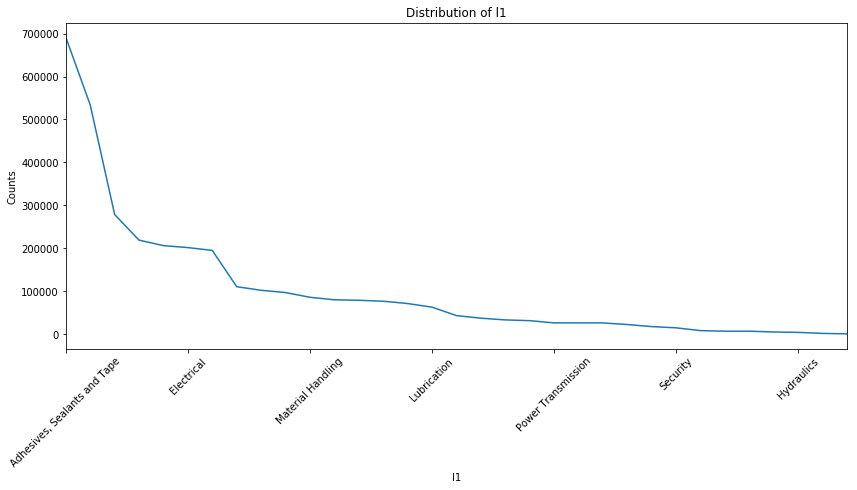

In [98]:
plot_feature(product_brand,'l1')

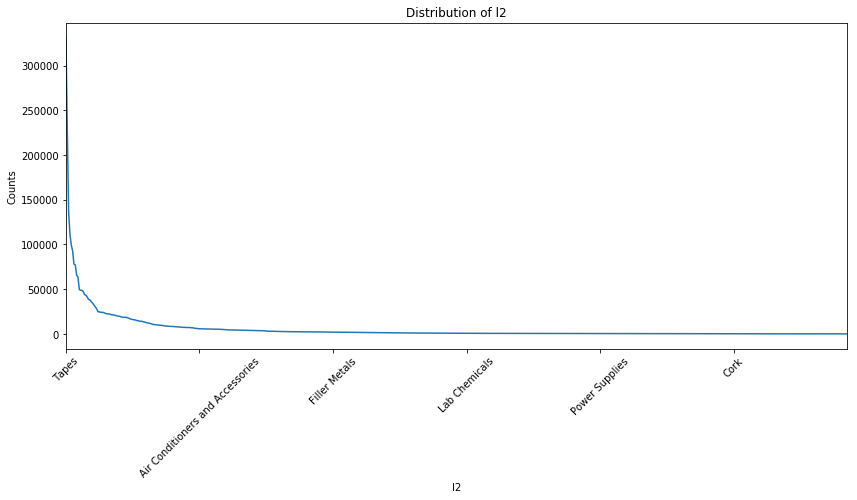

In [99]:
plot_feature(product_brand,'l2')

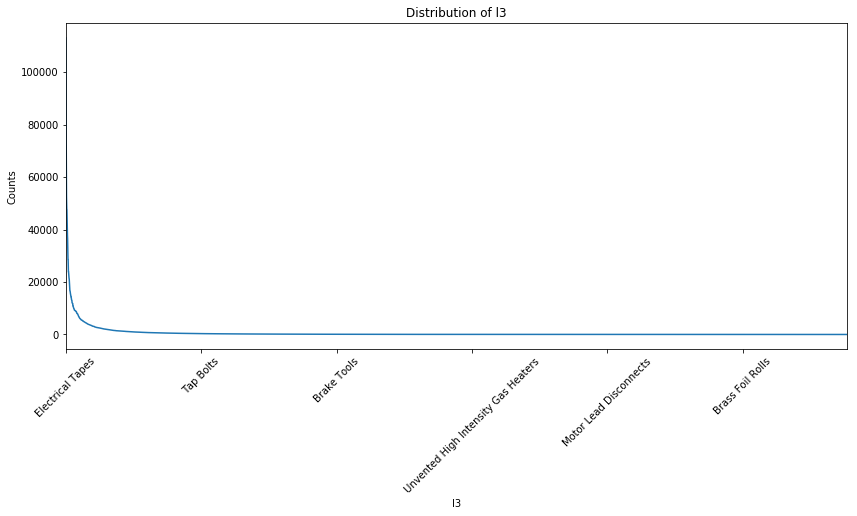

In [100]:
plot_feature(product_brand,'l3')

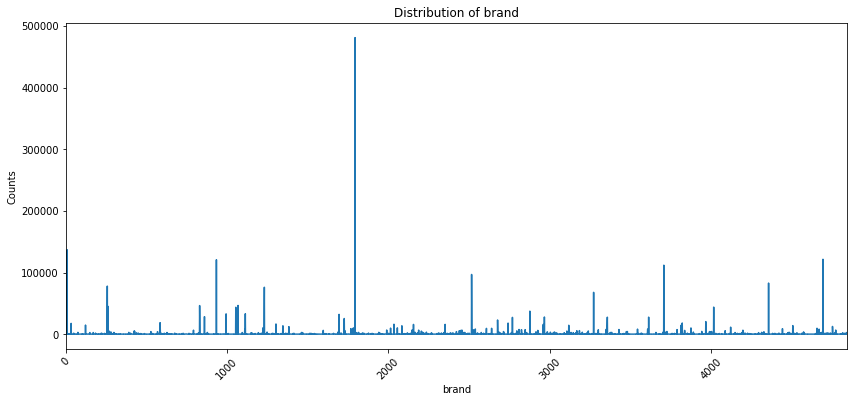

In [114]:
plot_feature(product_brand,'brand')

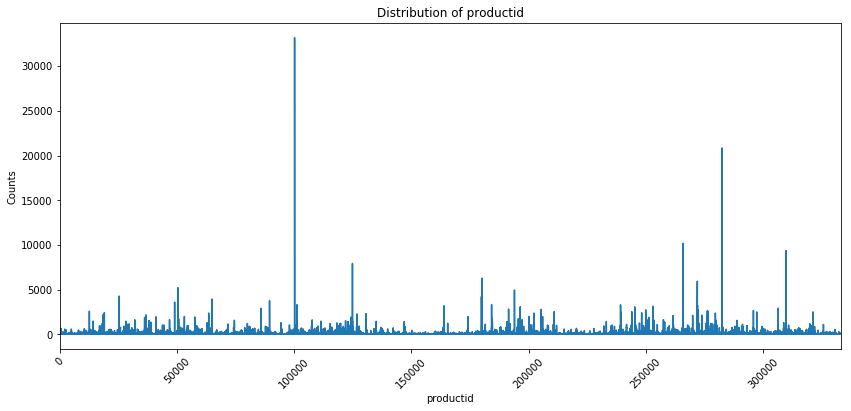

In [115]:
plot_feature(product_brand,'productid')

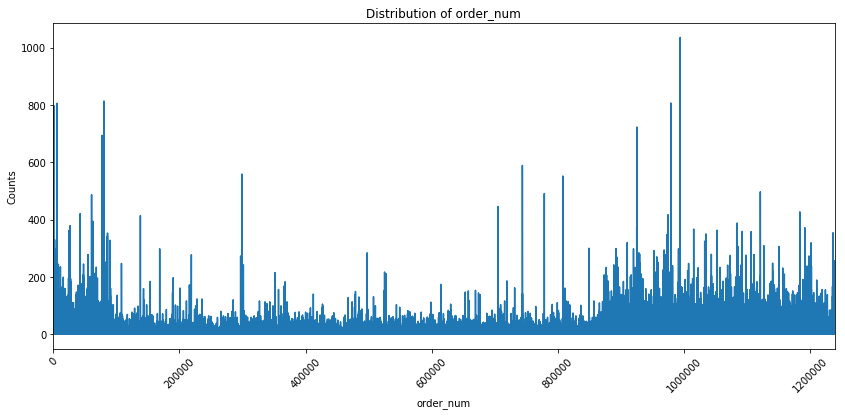

In [133]:
plot_feature(product_brand,'order_num')

## Develop strategies